## here i dont handle input for any csv file

## in this project my input handler only handle input for sales.csv (given)file  not for any csv file.
## Handle user input for ANY CSV-like DataFrame will be implemented in  data_anaysis_project

In [3]:
%%capture
!pip install -q langchain langgraph langchain_core langchain_community langchain-google-genai langchain_experimental

In [72]:
import os


os.environ["GOOGLE_API_KEY"]=google_api_key
os.environ["GROQ_API_KEY"]=groq_api_key




from langchain_google_genai import ChatGoogleGenerativeAI

# model_name="gemini-1.5-flash-latest"
model_name="gemini-pro"

llm=ChatGoogleGenerativeAI(
    model=model_name,
    temperature=0.2
)


In [70]:
!pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 10.8 MB/s eta 0:00:00


In [77]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama3-70b-8192",
    temperature=0,

)

In [84]:
import pandas as pd
csv_file_path="/content/sales_data_sample.csv"
df = pd.read_csv(csv_file_path, encoding='latin-1')

In [87]:
len(df)

2823

In [90]:
df_sampled.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [92]:
df_sampled = df.sample(n=5)
df_sampled.drop(['ORDERLINENUMBER', 'QTR_ID','MONTH_ID','ADDRESSLINE2','YEAR_ID','STATE','POSTALCODE','TERRITORY','CONTACTFIRSTNAME','CONTACTLASTNAME','PHONE','PRODUCTLINE','MSRP'] ,axis=1, inplace=True)
df_sampled

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,DEALSIZE
2308,10210,39,59.16,2307.24,1/12/2004 0:00,Shipped,S32_4289,Osaka Souveniers Co.,"Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku",Osaka,Japan,Small
2211,10285,37,41.03,1518.11,8/27/2004 0:00,Shipped,S32_2206,Marta's Replicas Co.,39323 Spinnaker Dr.,Cambridge,USA,Small
1525,10262,34,97.38,3310.92,6/24/2004 0:00,Cancelled,S24_1785,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,Spain,Medium
2527,10327,20,100.00,3469.20,11/10/2004 0:00,Resolved,S700_1938,Danish Wholesale Imports,Vinb'ltet 34,Kobenhavn,Denmark,Medium
1249,10196,27,100.00,4537.08,11/26/2003 0:00,Shipped,S18_4027,Super Scale Inc.,567 North Pendale Street,New Haven,USA,Medium


In [80]:
csv_file_path="/content/sales_data_sample.csv"


CSV file read successfully with latin-1 encoding.
Data converted to string for the LLM.
An unexpected error occurred: Error code: 413 - {'error': {'message': 'Request too large for model `llama3-70b-8192` in organization `org_01je8rvwyeeges0q42vafwhca0` service tier `on_demand` on tokens per minute (TPM): Limit 6000, Requested 271145, please reduce your message size and try again. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}


In [93]:
data = df_sampled.to_string()

In [94]:
data

"      ORDERNUMBER  QUANTITYORDERED  PRICEEACH    SALES        ORDERDATE     STATUS PRODUCTCODE              CUSTOMERNAME                              ADDRESSLINE1       CITY  COUNTRY DEALSIZE\n2308        10210               39      59.16  2307.24   1/12/2004 0:00    Shipped    S32_4289      Osaka Souveniers Co.  Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku      Osaka    Japan    Small\n2211        10285               37      41.03  1518.11   8/27/2004 0:00    Shipped    S32_2206      Marta's Replicas Co.                       39323 Spinnaker Dr.  Cambridge      USA    Small\n1525        10262               34      97.38  3310.92   6/24/2004 0:00  Cancelled    S24_1785     Euro Shopping Channel                        C/ Moralzarzal, 86     Madrid    Spain   Medium\n2527        10327               20     100.00  3469.20  11/10/2004 0:00   Resolved   S700_1938  Danish Wholesale Imports                              Vinb'ltet 34  Kobenhavn  Denmark   Medium\n1249        10196               27

In [106]:
df_sampled

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,DEALSIZE
2308,10210,39,59.16,2307.24,1/12/2004 0:00,Shipped,S32_4289,Osaka Souveniers Co.,"Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku",Osaka,Japan,Small
2211,10285,37,41.03,1518.11,8/27/2004 0:00,Shipped,S32_2206,Marta's Replicas Co.,39323 Spinnaker Dr.,Cambridge,USA,Small
1525,10262,34,97.38,3310.92,6/24/2004 0:00,Cancelled,S24_1785,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,Spain,Medium
2527,10327,20,100.00,3469.20,11/10/2004 0:00,Resolved,S700_1938,Danish Wholesale Imports,Vinb'ltet 34,Kobenhavn,Denmark,Medium
1249,10196,27,100.00,4537.08,11/26/2003 0:00,Shipped,S18_4027,Super Scale Inc.,567 North Pendale Street,New Haven,USA,Medium


In [96]:
generate_code="""
"You are an expert Python data analyst. I will provide you with a pandas dataFrame and a question about the data.
 Your task is to write the Python code necessary to answer my question. The code should be clean, well-commented, and ready to run,
 using libraries like pandas or others as needed.
 Modularity: Break down complex tasks into smaller, manageable functions or classes.
Readability: Use meaningful variable names, add comments where necessary, and maintain consistent indentation.
 Error Handling: Include basic error handling where appropriate.
 Your responses should be formatted as Python code blocks, ready to be copied and used.
 generate only the code and nothing else .

 here is the user query:{query}
 here is the dataFrane:{dataframe}
"""
prompt=ChatPromptTemplate.from_template(generate_code)

chain=prompt|llm

In [110]:
res=chain.invoke({"query":"which country has the highest average sales?","dataframe":data})

In [99]:
print(res.content)

```
import pandas as pd

def highest_average_sales_country(df):
    """
    This function calculates the average sales for each country and returns the country with the highest average sales.

    Parameters:
    df (pandas DataFrame): The input DataFrame containing the sales data.

    Returns:
    str: The country with the highest average sales.
    """
    # Group the data by country and calculate the average sales for each country
    avg_sales_by_country = df.groupby('COUNTRY')['SALES'].mean().reset_index()

    # Find the country with the highest average sales
    highest_avg_sales_country = avg_sales_by_country.loc[avg_sales_by_country['SALES'].idxmax()]['COUNTRY']

    return highest_avg_sales_country

# Assuming the DataFrame is stored in a variable called 'df'
result = highest_average_sales_country(df)
print(result)
```


In [104]:
python_tool = PythonREPLTool()

In [109]:
df_sampled.to_csv("temp.csv", index=False)

# Load inside REPL
python_tool.run("""
import pandas as pd
df = pd.read_csv("temp.csv")
""")



''

In [111]:
answer=python_tool.run(res.content)

In [112]:
answer

'Denmark\n'

In [119]:
res=chain.invoke({"query":"What is the average sales amount for each country in this datase?","dataframe":data})

In [102]:
print(res.content)

```
import pandas as pd

def calculate_average_sales_per_country(df):
    """
    Calculate the average sales amount for each country in the dataset.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame with the average sales amount for each country.
    """
    try:
        # Group the data by country and calculate the mean sales amount
        avg_sales_per_country = df.groupby('COUNTRY')['SALES'].mean().reset_index()

        return avg_sales_per_country
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Assuming the DataFrame is stored in a variable named 'df'
result = calculate_average_sales_per_country(df)
print(result)
```


In [121]:
answer=python_tool.run(res.content)
print(answer)

   COUNTRY     SALES
0  Denmark  3469.200
1    Japan  2307.240
2    Spain  3310.920
3      USA  3027.595



In [115]:
res=chain.invoke({"query":"What is the average sales amount for each country in this dataset, and which country has the highest average sales","dataframe":data})
print(res.content)

```
import pandas as pd

def calculate_average_sales_by_country(df):
    """
    Calculate the average sales amount for each country in the dataset.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame with the average sales amount for each country.
    """
    average_sales_by_country = df.groupby('COUNTRY')['SALES'].mean().reset_index()
    return average_sales_by_country

def find_country_with_highest_average_sales(df):
    """
    Find the country with the highest average sales amount.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        str: The country with the highest average sales amount.
    """
    average_sales_by_country = calculate_average_sales_by_country(df)
    country_with_highest_average_sales = average_sales_by_country.loc[average_sales_by_country['SALES'].idxmax()]['COUNTRY']
    return country_with_highest_average_sales

# Example usage
df = pd.DataFrame({
    'ORDERNUMBER': [2308, 22

In [117]:
answer=python_tool.run(res.content)
print(answer)

Average sales by country:
   COUNTRY     SALES
0  Denmark  3469.200
1    Japan  2307.240
2    Spain  3310.920
3      USA  3027.595
Country with highest average sales: Denmark



In [21]:
res=chain.invoke({"query":"calcucate 15 + 10 "})
res

AIMessage(content='```# Define the numbers for calculation\nnumber_one = 15\nnumber_two = 10\n\n# Perform the addition\nresult_sum = number_one + number_two\n\n# Print the calculated sum\nprint(result_sum)\n```', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--70ab1038-dc6c-462e-ac66-7664436a29b6-0', usage_metadata={'input_tokens': 415, 'output_tokens': 128, 'total_tokens': 543, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 73}})

In [22]:
print(res.content)

```# Define the numbers for calculation
number_one = 15
number_two = 10

# Perform the addition
result_sum = number_one + number_two

# Print the calculated sum
print(result_sum)
```


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage, AIMessage

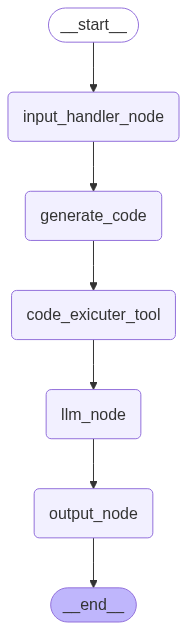

In [137]:
from langgraph.graph import StateGraph, START, END

from langchain_experimental.tools import PythonREPLTool
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from typing_extensions import TypedDict



#  Tool for Python execution (data analysis)
python_tool = PythonREPLTool()


class AgentState(TypedDict):
    query: str
    result: str
    code :str
    explanation:str
    output:str
    dataframe:object
    data:str



def input_handler_node(state:AgentState):
    """Handle user input."""
    df=state.get("dataframe","")
    df_sampled = df.sample(n=5)
    df_sampled.drop(['ORDERLINENUMBER', 'QTR_ID','MONTH_ID','ADDRESSLINE2','YEAR_ID','STATE','POSTALCODE','TERRITORY','CONTACTFIRSTNAME','CONTACTLASTNAME','PHONE','PRODUCTLINE','MSRP'] ,axis=1, inplace=True)
    data = df_sampled.to_string()
    return {"dataframe":df_sampled,"data":data}


def llm_node(state: AgentState):
    """ explanation  via LLM."""
    template="""you are expert in explaing the code to user.
    given a user query and the code expain the code to user.
    CODE : {code}
    QUERY : {query}
    """
    explain_prompt=ChatPromptTemplate.from_template(template)
    explain_chain=explain_prompt|llm|StrOutputParser()
    response = explain_chain.invoke({"query":state["query"],"code":state["code"]})
    return {"explanation": response}


def generate_code(state: AgentState):
    """Generate Python code via LLM and clean it."""
    query = state.get("query", "")
    data = state.get("data", "")

    response = chain.invoke({"query": query, "dataframe": data})

    # Handle both string and LLM response objects
    code_content = getattr(response, "content", response)
    code_content = code_content.strip()

    # Remove all markdown fences if present
    if "```" in code_content:
        code_content = code_content.split("```")[1]  # take middle part
    if code_content.startswith("python"):
        code_content = code_content[len("python"):]

    code_content = code_content.strip()
    return {"code": code_content}






def code_exicuter_tool(state: AgentState):
    """Execute code safely in Python REPL."""
    code = state.get("code", "")
    df_sampled = state.get("dataframe", "")
    df_sampled.to_csv("temp.csv", index=False)

    # Always start with dataframe load
    preamble = (
        "import pandas as pd\n"
        "df = pd.read_csv('temp.csv')\n"
    )

    # Detect if code is a single line expression (no newlines, no def, no import)
    if "\n" not in code and not any(kw in code for kw in ["import", "def", "=", "for", "while"]):
        wrapped_code = preamble + f"print({code})"
    else:
        wrapped_code = preamble + code

    response = python_tool.run(wrapped_code)
    return {"result": str(response)}


def output_node(state:AgentState):
    template="""you are expert in presenting output to the user given a query ,code , answer  to the query.
    format of output:
      **Your Query:**
      **Generated code:**
      **ans:**


    ANSWER : {result}
    QUERY : {query}
    CODE : {code}
    present the output
    """
    explain_prompt=ChatPromptTemplate.from_template(template)
    explain_chain=explain_prompt|llm|StrOutputParser()
    response = explain_chain.invoke({"query":state["query"],"result":state["result"],"code":state["code"]})
    return {"output": response}



workflow = StateGraph(AgentState)
workflow.add_node("input_handler_node",input_handler_node)
workflow.add_node("llm_node", llm_node)
workflow.add_node("generate_code", generate_code)
workflow.add_node("code_exicuter_tool", code_exicuter_tool)
workflow.add_node("output_node", output_node)

workflow.add_edge(START,"input_handler_node")
workflow.add_edge("input_handler_node", "generate_code")
workflow.add_edge("generate_code", "code_exicuter_tool")
workflow.add_edge("code_exicuter_tool", "llm_node")
workflow.add_edge("llm_node", "output_node")
workflow.add_edge("output_node", END)

app = workflow.compile()


app

In [138]:
user_query="Find the total sales amount for all orders"
state = {"query": user_query,"dataframe":df}
final_state = app.invoke(state)
print("Answer:", final_state["result"])
print("------"*80)
print("output:", final_state['output'])

Answer: Total sales amount: 15983.58

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
output: **Your Query:** Find the total sales amount for all orders
**Generated code:**
```
import pandas as pd

def calculate_total_sales(df):
    """
    Calculate the total sales amount for all orders.

    Args:
        df (pd.DataFrame): The input DataFrame containing the sales data.

    Returns:
        float: The total sales amount.
    """
    try:
        total_sales = df['SALES'].sum()
        return total_sales
    except KeyError:
        print("Error: 'SALES' colu

In [139]:
user_query="List all unique countries where customers placed orders."
state = {"query": user_query,"dataframe":df}
final_state = app.invoke(state)
print("Answer:", final_state["result"])
print("------"*80)
print("output:", final_state['output'])

Answer: ['France', 'Finland', 'USA']

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
output: **Your Query:** List all unique countries where customers placed orders.

**Generated code:**
```
import pandas as pd

def get_unique_countries(df):
    """
    Returns a list of unique countries where customers placed orders.
    
    Parameters:
    df (pandas DataFrame): The input DataFrame containing order data.
    
    Returns:
    list: A list of unique countries.
    """
    try:
        unique_countries = df['COUNTRY'].unique().tolist()
        return unique_c

In [140]:
user_query="Which country has the highest average sales per order, and what is that average?"
state = {"query": user_query,"dataframe":df}
final_state = app.invoke(state)
print("Answer:", final_state["result"])
print("------"*80)
print("output:", final_state['output'])

Answer: The country with the highest average sales per order is USA with an average of 4991.64.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
output: **Your Query:** Which country has the highest average sales per order, and what is that average?

**Generated code:**
```
import pandas as pd

def highest_average_sales_per_country(df):
    """
    Calculate the country with the highest average sales per order.

    Parameters:
    df (pandas.DataFrame): The input DataFrame.

    Returns:
    tuple: A tuple containing the country with the highest average sales 